<a href="https://colab.research.google.com/github/AKHILESH-create/Wine-Quality-Prediction/blob/main/wineCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("sample_data/final_alcohol.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,2732,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,1,2607,5.3,0.31,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,3,3264,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
3,5,4859,8.4,0.32,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6,White Wine
4,6,5827,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6,White Wine


In [ ]:
df['quality'].value_counts()

,count
quality,
6,2076
5,1304
7,868
8,159
4,118
3,11
9,5


In [ ]:
df["quality"] = (df["quality"] >= 6).astype(int)

In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,1,White Wine
1,5.3,0.31,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,1,White Wine
2,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,1,White Wine
3,8.4,0.32,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,1,White Wine
4,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,1,White Wine


In [ ]:
x = df.drop("quality", axis=1)
y = df['quality']

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,White Wine
1,5.3,0.31,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,White Wine
2,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,White Wine
3,8.4,0.32,0.35,11.70,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,White Wine
4,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,White Wine


In [ ]:
y.head()

,quality
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
enc

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# fit and tranform the column

In [ ]:
enc.fit(x_train[['Type']])

x_train_encoded = enc.transform(x_train[['Type']])
x_test_encoded = enc.transform(x_test[['Type']])

# convert the arrays to df

In [ ]:
encoded_cols = enc.get_feature_names_out(['Type'])

x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoded_cols, index=x_train.index)
x_test_encoded = pd.DataFrame(x_test_encoded, columns=encoded_cols, index=x_test.index)

# Drop og rows and replace with encoded row

In [ ]:
x_train_final = pd.concat([x_train.drop(columns=['Type']), x_train_encoded], axis=1)
x_test_final = pd.concat([x_test.drop(columns=['Type']), x_test_encoded], axis=1)

# Import Model and fit data

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cr = DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2
)
cr.fit(x_train_final, y_train)

DecisionTreeClassifier()

In [ ]:
cr.score(x_test_final, y_test)

0.7997799779977998

In [ ]:
print("Train Accuracy:", cr.score(x_train_final, y_train))
print("Test Accuracy:", cr.score(x_test_final, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7997799779977998


In [ ]:
x_test_final.iloc[0]

,1647
fixed acidity,7.60000
volatile acidity,0.39000
citric acid,0.32000
residual sugar,3.60000
chlorides,0.03500
free sulfur dioxide,22.00000
total sulfur dioxide,93.00000
density,0.99144
pH,3.08000
sulphates,0.60000


In [ ]:
y_pred = cr.predict(x_test_final)

In [ ]:
print("Pred:", cr.predict(x_test_final.iloc[[120]]))
print("Actual:", y_test.iloc[120])

Pred: [1]
Actual: 1


# Confusion Matrix

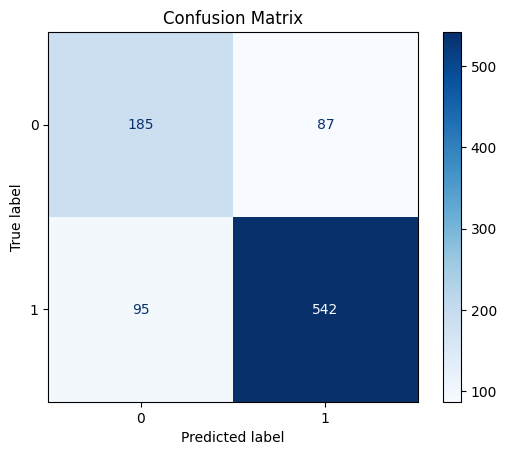

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# KNN Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_final)
x_test = scaler.transform(x_test_final)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7865786578657866

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.59      0.62       272
           1       0.83      0.87      0.85       637

    accuracy                           0.79       909
   macro avg       0.75      0.73      0.74       909
weighted avg       0.78      0.79      0.78       909



Confusion Matrix:
 [[160 112]
 [ 82 555]]


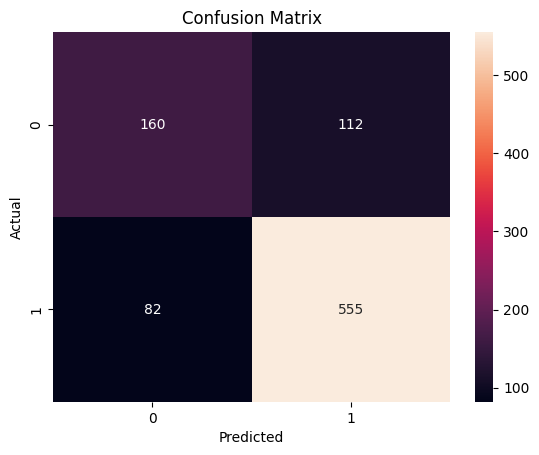

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

# Plot
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Random forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# rf = RandomForestClassifier(random_state=42)

# param_dist = {
#     'n_estimators': np.arange(100, 500, 50),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     rf,
#     param_distributions=param_dist,
#     n_iter=20,
#     cv=5,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(x_train, y_train)

# print("Best Parameters:", random_search.best_params_)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None
)


rf_model.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
rf_model.score(x_test, y_test)


0.8393839383938394

# Confusion Matrix

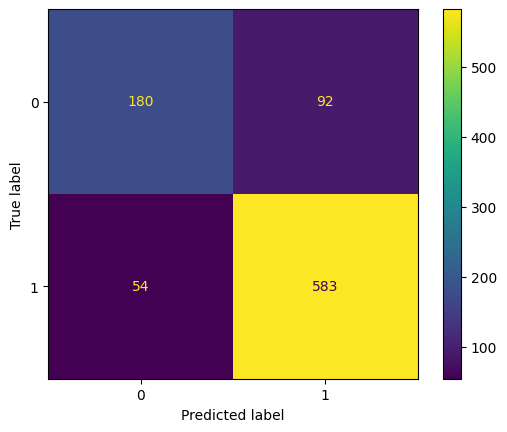

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression(max_iter=200)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("accuracy: ", model.score(x_test, y_test))

accuracy:  0.7491749174917491


In [ ]:
print("\n===== Classification Report =====\n")
print(classification_report(y_test, y_pred))


===== Classification Report =====

              precision    recall  f1-score   support

           0       0.61      0.46      0.52       272
           1       0.79      0.87      0.83       637

    accuracy                           0.75       909
   macro avg       0.70      0.67      0.68       909
weighted avg       0.74      0.75      0.74       909



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[124 148]
 [ 80 557]]


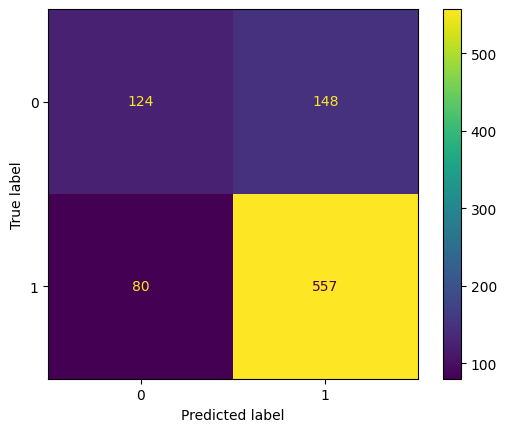

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()

# NAIVE BAYES

In [ ]:
#GAUSSIAN
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
classifier.score(x_test,y_test)

0.7051705170517052

In [ ]:
#MULTINOMIAL
# from sklearn.naive_bayes import MultinomialNB
# cm=MultinomialNB()
# cm.fit(x_train,y_train)
# This code is commented out because MultinomialNB cannot handle negative values produced by StandardScaler.

In [ ]:
#CONFUSION MATRIX
y_pred=classifier.predict(x_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

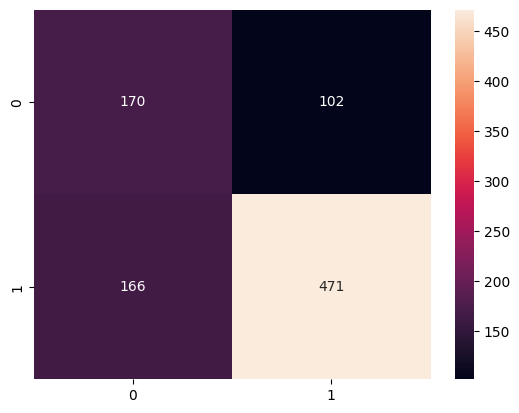

In [ ]:
sns.heatmap (cm,annot=True,fmt='g')

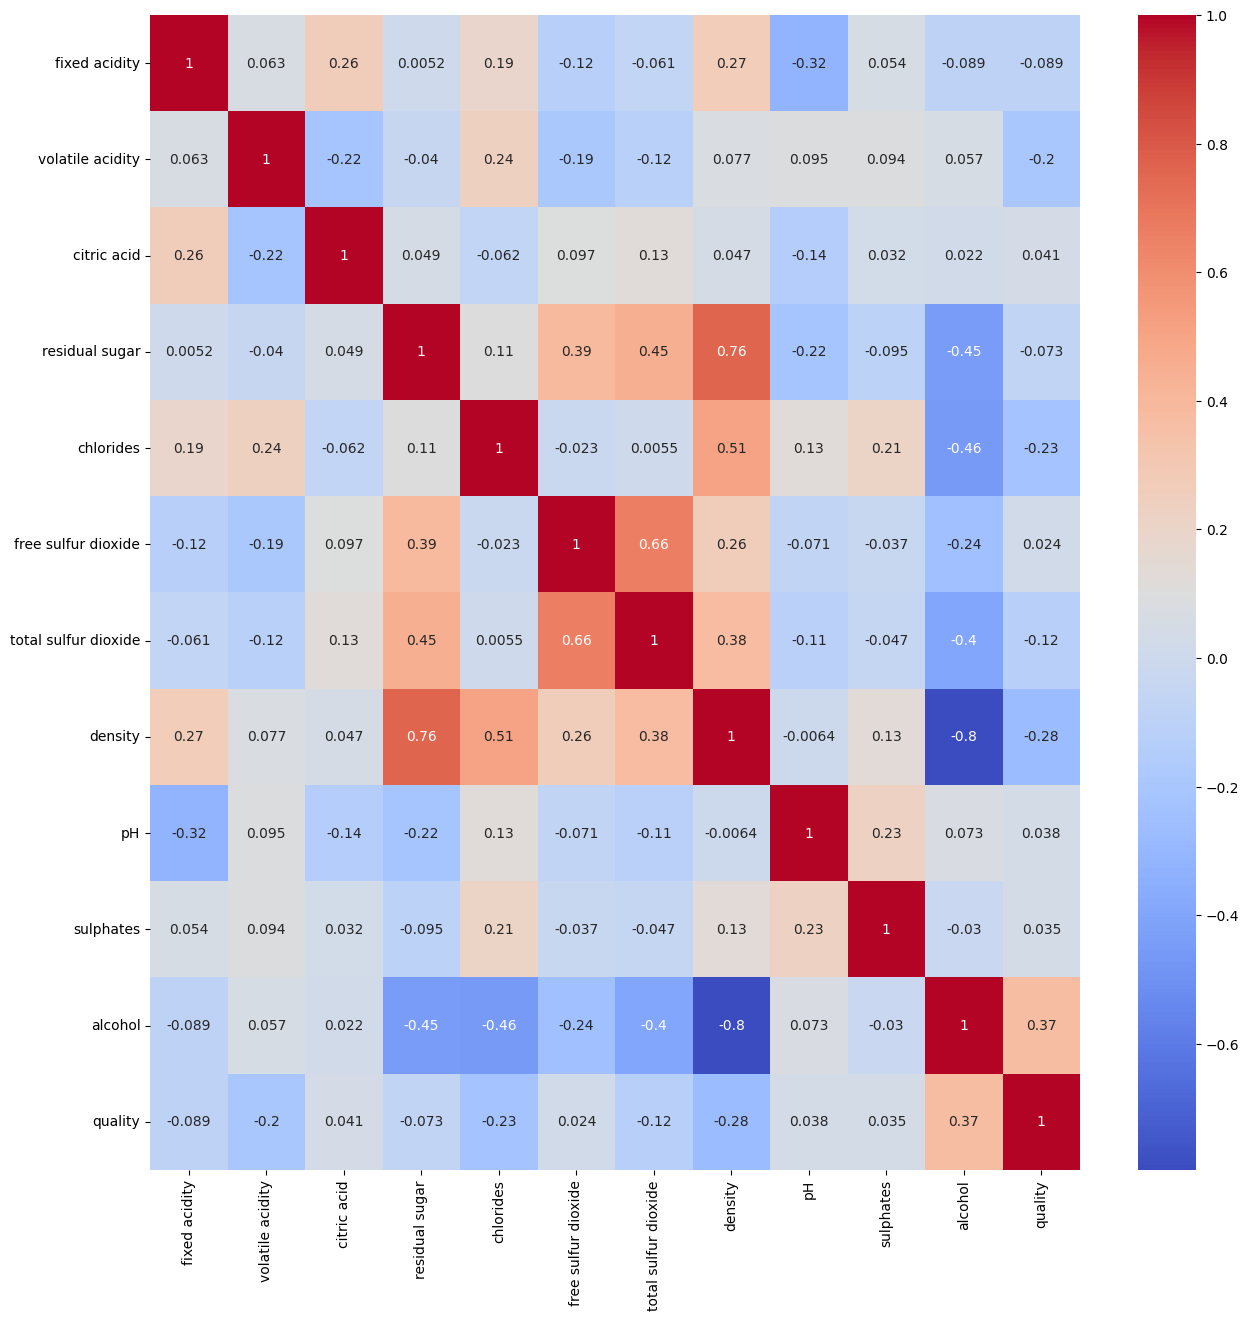

In [ ]:
# correlation
df=df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7051705170517052


In [ ]:
pre=precision_score(y_test,y_pred)
print("Precision:", pre)

Precision: 0.8219895287958116


In [ ]:
re=recall_score(y_test,y_pred)
print("Recall:",re)

Recall: 0.7394034536891679


In [ ]:
f1=f1_score(y_test,y_pred)
print("F1:",f1)

F1: 0.7785123966942149


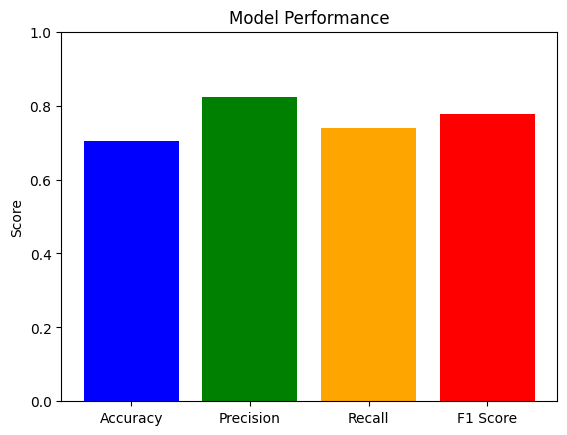

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, pre, re, f1]
plt.bar(metrics, values, color=['blue','green','orange','red'])

plt.ylim(0,1)
plt.title("Model Performance")
plt.ylabel("Score")

plt.show()

# THANK YOU